# 1. Setup & Load Data

### 1.1 Install Dependencies and Setup

In [268]:
!pip install tensorflow opencv-python matplotlib

In [269]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [270]:
import tensorflow as tf
import os

In [271]:
os.listdir('data')

['happy', 'sad']

In [272]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [273]:
tf.config.list_physical_devices('GPU')

[]

### 1.2 Remove dodgy images

In [274]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [275]:
data_dir = 'data'

In [276]:
os.listdir(os.path.join(data_dir, 'sad'))

['0x0.jpg',
 '1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg',
 '280-2804580_sad-people-png-sad-person-png-transparent-png.png',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 '504212.jpg',
 '51079685_M-1280x429.jpg',
 '51079685_M.jpg',
 '52672678._SX318_SY475_.jpg',
 '5360f7e3f9a01bb1aa10654514442436.500x500x1.jpg',
 '6-Best-and-worst-things-to-say.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '766x415_Depression_vs_Sadness.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD.jpg',
 '8iAb9k4aT.jpg',
 'AdobeStock_221688877-copy.jpg',
 'artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg',
 'artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg',
 'at-home-sad-sofa-300x200.jpg',
 'b11b520b0818895ae5563d1e70294052.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'boy-with-head-down.jpg',
 'crying-at-work.jpg',
 'Crying-girl.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'DD-blogpost-SAD-940x492.png',
 'de2a0f4d137d0aeb839d43a2ea9b6c72.jpg',
 'Depressed-woman-covering-he

In [277]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [278]:
img = cv2.imread(os.path.join('data', 'sad', 'sad-looking-man.jpg' ))

In [279]:
img

array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)

In [280]:
img.shape 

#number of pixels in rows and columns, 3 means that it's a colorful image

(734, 1100, 3)

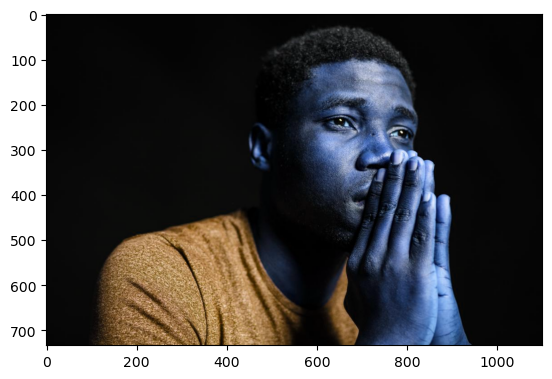

In [281]:
plt.imshow(img)

In [282]:
#opencv reads images as BGR , matplotlib expects to be RGB, so to fix this :

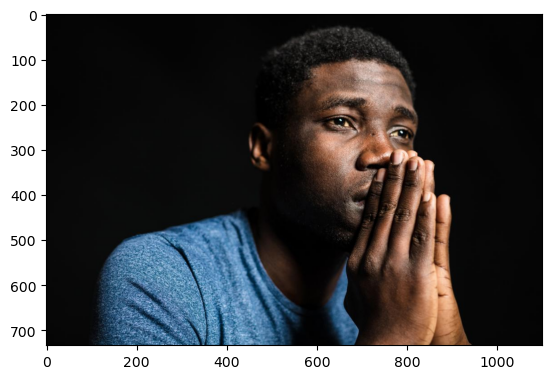

In [283]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show() #to remove <matplotlib.image......>

In [284]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 1.3 Load Data

In [285]:
tf.data.Dataset??

In [286]:
import numpy as np

In [287]:
tf.keras.utils.image_dataset_from_directory??

In [288]:
data = tf.keras.utils.image_dataset_from_directory('data') 

#building an image dataset for you on the fly, you don't need to build labels,you don't need to build classes
#building our data pipeline

Found 170 files belonging to 2 classes.


In [289]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [290]:
data_iterator = data.as_numpy_iterator()

#allowing us to access our data pipeline
#allowing us to loop through it

In [291]:
data_iterator

In [292]:
#get another batch from the iterator

batch = data_iterator.next()

#accessing the data pipeline itself
#grapping one batch back ( batch of data = lot de données)

In [293]:
batch

(array([[[[194.      , 157.      , 105.      ],
          [194.16406 , 157.16406 , 105.16406 ],
          [195.27344 , 158.27344 , 106.27344 ],
          ...,
          [190.      , 157.      , 114.      ],
          [190.      , 157.      , 114.      ],
          [190.      , 157.      , 114.      ]],
 
         [[194.02937 , 157.02937 , 105.02937 ],
          [194.70117 , 157.70117 , 105.70117 ],
          [195.81055 , 158.81055 , 106.81055 ],
          ...,
          [190.53711 , 157.53711 , 114.53711 ],
          [190.53711 , 157.53711 , 114.53711 ],
          [190.53711 , 157.53711 , 114.53711 ]],
 
         [[194.2832  , 157.2832  , 105.2832  ],
          [195.39258 , 158.39258 , 106.39258 ],
          [196.50195 , 159.50195 , 107.50195 ],
          ...,
          [191.      , 158.      , 115.      ],
          [191.      , 158.      , 115.      ],
          [191.      , 158.      , 115.      ]],
 
         ...,
 
         [[ 75.29649 ,  39.60939 ,  13.110168],
          [ 88.673

In [294]:
len(batch)  

#there is 2 parts to this dataset, there is the images and then there is the labels
#first part is image representation, it's our images from our directory loaded into memory as set of numpy arrays

2

In [295]:
batch[0].shape

# 32 images

(32, 256, 256, 3)

In [296]:
batch[1]

# Class 0 is assigned to happy images and Class 1 is assigned to sad images

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

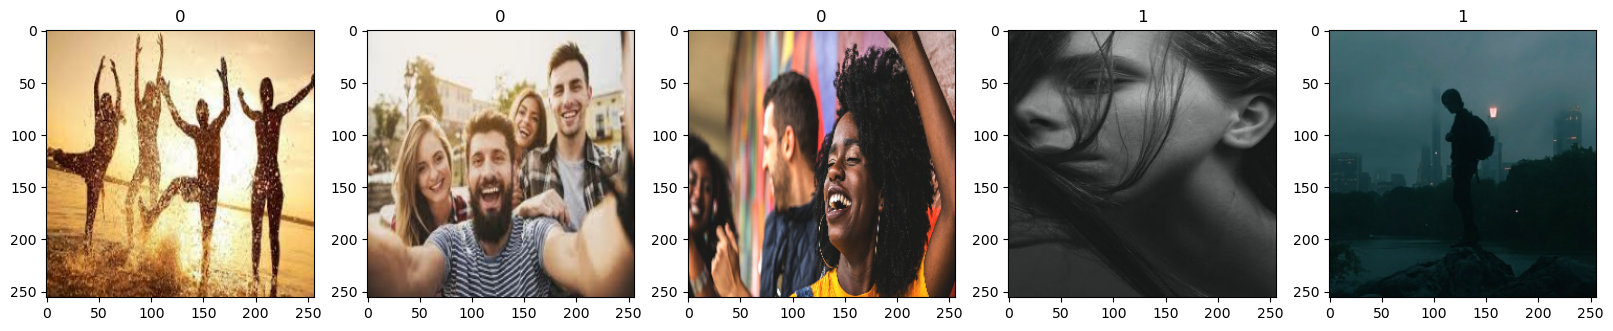

In [297]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [298]:
batch[0].max()

255.0

# 2. Preprocess Data

### 2.1 Scale Data

In [299]:
data = data.map(lambda x,y: (x/255, y))

# map function returns a new dataset containing the transformed elements, in the same order as they  appeared in the input

In [300]:
scaled_iterator = data.as_numpy_iterator()

In [301]:
batch = scaled_iterator.next()

In [302]:
batch[0].max()

1.0

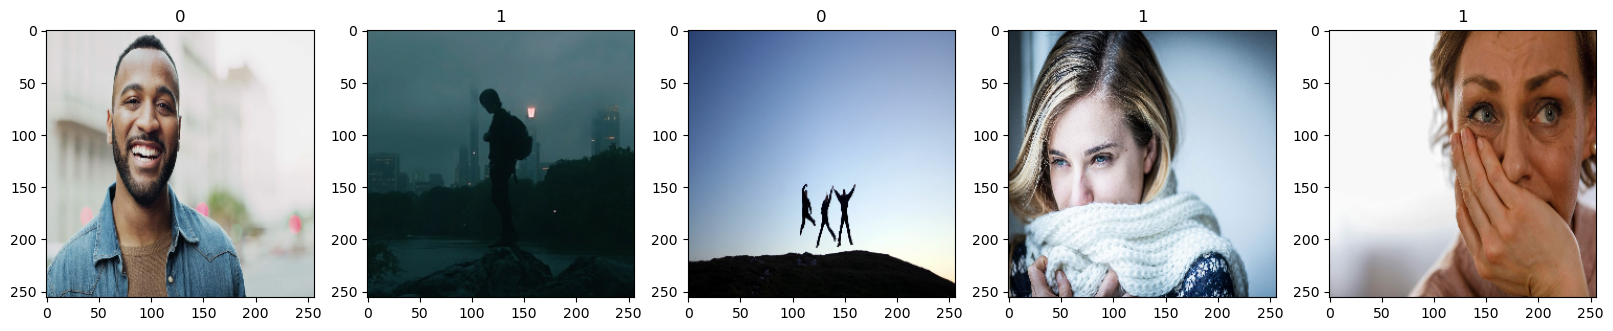

In [303]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)                         #it's not an integer now
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [304]:
len(data)

#we have 6 batches and each batch has 32 images ( there's probably one that's going to be truncated if it's not equal batches )

6

In [305]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [306]:
train_size

4

In [307]:
val_size

1

In [308]:
test_size

1

In [309]:
train_size+val_size+test_size

6

In [310]:
train = data.take(train_size) 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# take and skip are tensorflow funtions that defines how much data we are going to take or skip in that particular partition

In [311]:
len(train)

4

# 3. Deep Model

### 3.1 Build Deep Learning Model

In [312]:
from tensorflow.keras.models import Sequential #API

#this is great if we've got one data input and one data output and the model sort of just flows from top to bottom
#great if we need sth quick and easy for deep learning classification

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Conv2D is a convolutional neural network layer (CNN) ==> spatial convolution over images
# MaxPooling2D is like condensing layer
# Dense is a fully connected layer
# Flatten allows us to go for a convolutional layer which has channels and actually reduces it back into a format 
#which our Dense layer will be able to take
# Dropout used for regularization

In [313]:
model = Sequential()

In [314]:
# This convolution is going to have 16 filters, the filter is going to be 3*3 pixels in size (shape), stride (step) of 1
# relu activation : converting any negative output to zero and anything positive remains unchaneged ==> non-linear patterns
# ==> architectural decisions

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) # this is just gonna take the maximum region after the relu activation <==> condense the information

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#Condense the rows and columns and then the number of filters will form the channel value

#Condense that channel to a single value
model.add(Dense(256, activation='relu')) # 256 neurons (values) as output
model.add(Dense(1, activation='sigmoid')) # finally just one value as output which going to represent 0 or 1 (happy or sad)
# Sigmoid activation takes any output and converts it into a range between 0 and 1 


# Conclusion : fully connected layers

In [315]:
MaxPooling2D??

In [316]:
#tf.optimizers.adam ( there is more)

In [317]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

#the optimizer that we want to use is 'adam', our loss, metric

In [318]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [319]:
30*30*16  # number of inputs that are going into our flattened layer <==> we're condensing them down into a single dimension 

14400

### 3.2 Train

In [320]:
logdir='logs'

In [321]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [322]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

#model.fit is the training component
#epochs is how long we're actually going to go ahead and train for <==> one epoch : one run over our entire training set of data

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 1.2505 - accuracy: 0.5312 - val_loss: 1.1443 - val_accuracy: 0.2812
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.8166 - accuracy: 0.4844 - val_loss: 0.6974 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6620 - accuracy: 0.6172 - val_loss: 0.6439 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6742 - accuracy: 0.6172 - val_loss: 0.6638 - val_accuracy: 0.5938
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.5958 - accuracy: 0.7188 - val_loss: 0.5863 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.5464 - accuracy: 0.7422 - val_loss: 0.5866 - val_accuracy: 0.6250
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.4438 - accuracy: 0.8281 - val_loss: 0.4200 - val_accuracy: 0.7188
Epoch 8/20
4/4 [=========================

In [323]:
hist.history

{'loss': [1.2504644393920898,
  0.8166069984436035,
  0.6619635820388794,
  0.6742061972618103,
  0.5958073139190674,
  0.5463723540306091,
  0.44377052783966064,
  0.3834611475467682,
  0.32826656103134155,
  0.32967841625213623,
  0.2538979649543762,
  0.21801012754440308,
  0.13305135071277618,
  0.08018743991851807,
  0.10558786243200302,
  0.08509161323308945,
  0.07400058209896088,
  0.028660248965024948,
  0.023135853931307793,
  0.018104592338204384],
 'accuracy': [0.53125,
  0.484375,
  0.6171875,
  0.6171875,
  0.71875,
  0.7421875,
  0.828125,
  0.8359375,
  0.84375,
  0.84375,
  0.9140625,
  0.90625,
  0.9765625,
  0.984375,
  0.9609375,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.144307017326355,
  0.6974096298217773,
  0.6439418792724609,
  0.6638455390930176,
  0.5862528085708618,
  0.586601734161377,
  0.4199755787849426,
  0.39125433564186096,
  0.4121227562427521,
  0.3042352497577667,
  0.16115254163742065,
  0.11756397783756256,
  0.1785607933998108,
  0

### 3.3 Plot Performance

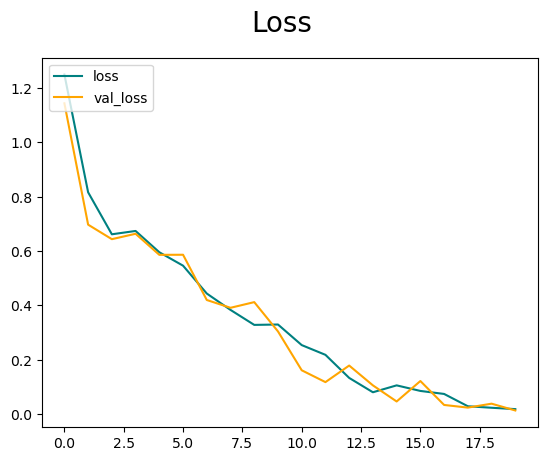

In [324]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [325]:
### our loss has sort of decreased pretty steadily over time, we've had one bit of spike but it's sort of come back.
### if you start to see your loss going down and your validation loss sort of rising up, 
### that is an indication that your model may be overfitting so it might be time to look at applying some regularization, 
### it might also mean that we need to apply some data or change some data.
### if you don't see these decreasing at all or if you see your green line like not decreasing or going weird,
### this might mean that you need to take a look at your training data again, 
### maybe potentially a larger neural network or more sophisticated neural network because that means that 
### it's not able to learn or reduce the loss for that particular data or that training data overall,
### so it might mean that we have a bit of a bias problem.
### if the validation law starts tearing off, that might mean you have a variance problem so again, 
### regularization is your friend in that particular case.
### we've got our loss metrics so visualize those.

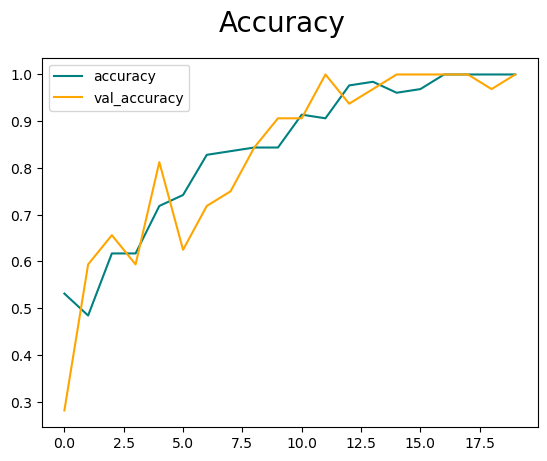

In [326]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [327]:
### we can see that our accuracy steadily increased over time, we had a little bit of pop out there but again we've come back
### and it has resolved back up to 100% accuracy which is very very good.
### Obviously, this model is performing well, there's not a ton of data so ideally
## you'd want to flesh this out with a ton more data but in that particular case, that is our model now trained.

# 4. Evaluate Performance

### 4.1 Evaluate

In [328]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [329]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

### establish instances of different measures that we use for classification

In [330]:
len(test)

1

In [331]:
for batch in test.as_numpy_iterator(): 
    X, y = batch                       # our set of images (our y True value)
    yhat = model.predict(X)            # return a set of values between 0 and 1 (sigmoid activation)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 134ms/step


In [332]:
print(f' Presicion :{pre.result().numpy()}, Recall :{re.result().numpy()}, Accuracy :{acc.result().numpy()}')

# Higher values means our model performing better

 Presicion :1.0, Recall :1.0, Accuracy :1.0


### 4.2 Test

In [333]:
import cv2

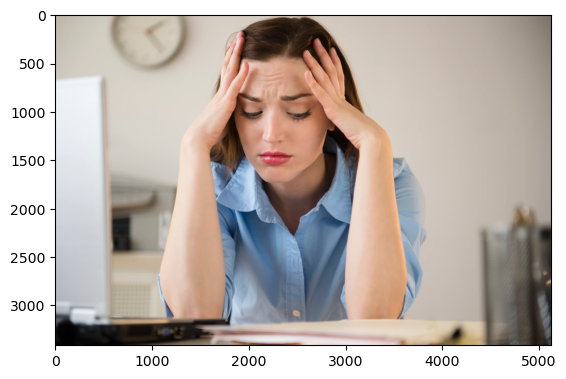

In [334]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

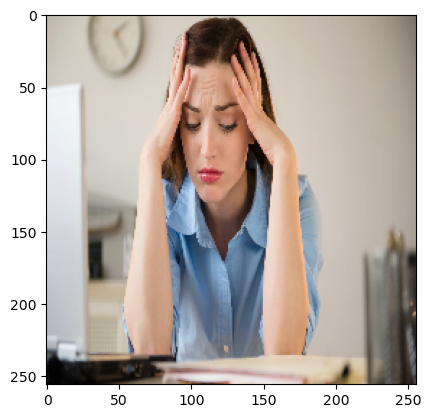

In [335]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [336]:
# our neural network expects us to pass through a batch of images  not a single image, 
# so, what we actually need to do is we need to encapsulate it inside of another set of parentheses or arrays 
# or put it inside of a list

In [337]:
np.expand_dims(resize, 0)

array([[[[184.       , 179.       , 167.       ],
         [185.       , 180.       , 168.       ],
         [188.       , 183.       , 171.       ],
         ...,
         [126.       , 116.       , 105.       ],
         [123.53516  , 114.53516  , 103.53516  ],
         [120.       , 110.       , 102.       ]],

        [[185.       , 180.       , 168.       ],
         [186.       , 182.       , 170.       ],
         [189.       , 184.       , 172.       ],
         ...,
         [126.       , 116.       , 105.       ],
         [126.       , 116.       , 105.       ],
         [120.25986  , 110.25986  , 102.25986  ]],

        [[186.       , 182.       , 170.       ],
         [188.       , 183.       , 171.       ],
         [189.       , 184.       , 172.       ],
         ...,
         [127.       , 117.       , 107.       ],
         [124.       , 115.       , 104.       ],
         [122.51172  , 113.02344  , 102.51172  ]],

        ...,

        [[  9.       ,   9.       ,  1

In [338]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [339]:
yhat

array([[0.99148244]], dtype=float32)

In [340]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 5. Save the Model

### 5.1 Save the Model

In [341]:
### we can reload it at a future date. It's could deployed as an api or to an edge device. 

In [342]:
from tensorflow.keras.models import load_model

In [343]:
model.save(os.path.join('models','happysadmodel.h5'))

#h5 is a serialization file format

In [344]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [345]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 106ms/step


In [346]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
